## SENTIMENTAL ANALYSIS IN PYTHON

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk





In [143]:
import csv
df = pd.read_csv("Reviews.csv", engine="python", quoting=csv.QUOTE_NONE, on_bad_lines="skip")
#tells to use python's parsing engine instead of c engine which is more flexible to handle messy csv files
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu..."
2,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
3,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
4,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [144]:
df["Text"].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [145]:
df.shape

(130215, 10)

In [146]:
df=df.head(500)

In [147]:
df.shape

(500, 10)

## qucik eda

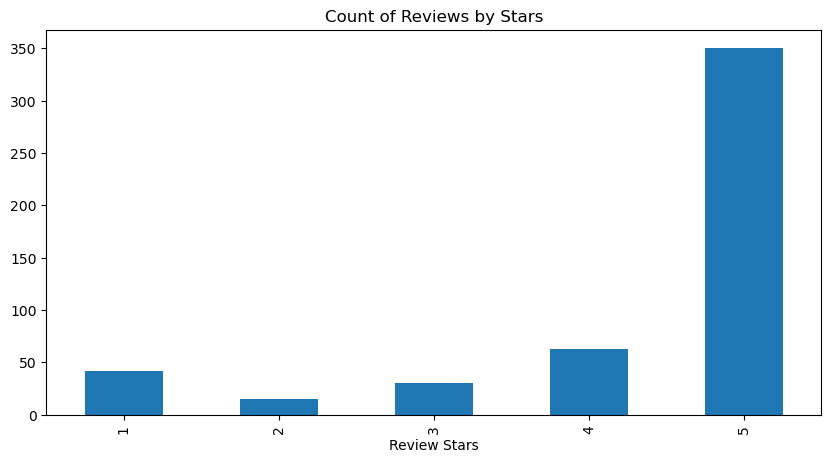

In [149]:
ax=df["Score"].value_counts().sort_index().plot(kind="bar", title="Count of Reviews by Stars",figsize=(10,5))
ax.set_xlabel("Review Stars")
plt.show()

# #we can see most of the reviews are of 5 stars

## basic nltk

In [152]:
example= df["Text"][50]
print(example)

AWESOME!!! such a yummy flavor I got it as a healthy alternative to the desserts we normally eat and I am so glad that I did there are so many things you can do with Jello desserts and still have them taste good and be good for you. I will definitentally be purchasing this product again the flavor was so wonderful.


In [153]:
import nltk
nltk.download("punkt")

tokens=nltk.word_tokenize(example)
tokens[:10]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aagya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['AWESOME', '!', '!', '!', 'such', 'a', 'yummy', 'flavor', 'I', 'got']

#pos_tag= tells its a noun,pronoun,adjective

In [155]:
import nltk
nltk.download("averaged_perceptron_tagger_eng")


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Aagya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [156]:
import nltk
nltk.download("averaged_perceptron_tagger")


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Aagya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [157]:
tagged=nltk.pos_tag(tokens)
tagged[:10]

[('AWESOME', 'RB'),
 ('!', '.'),
 ('!', '.'),
 ('!', '.'),
 ('such', 'PDT'),
 ('a', 'DT'),
 ('yummy', 'JJ'),
 ('flavor', 'NN'),
 ('I', 'PRP'),
 ('got', 'VBD')]

In [158]:
import nltk

nltk.download('maxent_ne_chunker_tab')

entities = nltk.ne_chunk(tagged)
entities.pprint()


[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\Aagya\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!


(S
  AWESOME/RB
  !/.
  !/.
  !/.
  such/PDT
  a/DT
  yummy/JJ
  flavor/NN
  I/PRP
  got/VBD
  it/PRP
  as/IN
  a/DT
  healthy/JJ
  alternative/NN
  to/TO
  the/DT
  desserts/NNS
  we/PRP
  normally/RB
  eat/VBP
  and/CC
  I/PRP
  am/VBP
  so/RB
  glad/JJ
  that/IN
  I/PRP
  did/VBD
  there/EX
  are/VBP
  so/RB
  many/JJ
  things/NNS
  you/PRP
  can/MD
  do/VB
  with/IN
  (PERSON Jello/NNP)
  desserts/NNS
  and/CC
  still/RB
  have/VB
  them/PRP
  taste/VB
  good/JJ
  and/CC
  be/VB
  good/JJ
  for/IN
  you/PRP
  ./.
  I/PRP
  will/MD
  definitentally/RB
  be/VB
  purchasing/VBG
  this/DT
  product/NN
  again/RB
  the/DT
  flavor/NN
  was/VBD
  so/RB
  wonderful/JJ
  ./.)


# Step 1:VADER Seniment Scoring=VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach

In [160]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm


sia=SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Aagya\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [161]:
sia.polarity_scores("I m so happy!")#this gives scores to pos or neg review

{'neg': 0.0, 'neu': 0.189, 'pos': 0.811, 'compound': 0.6468}

In [162]:
sia.polarity_scores("this isthe worst thing ever.")

{'neg': 0.506, 'neu': 0.494, 'pos': 0.0, 'compound': -0.6249}

In [163]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'compound': 0.9803}

# Run the polarity score on the entire dataset 

In [165]:
res={}
for i,row in tqdm(df.iterrows(),total=len(df)):
    text=row["Text"]
    myid=row["Id"]
    res[myid]=sia.polarity_scores(text) 


100%|██████████| 500/500 [00:00<00:00, 1180.20it/s]


In [166]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 17: {'neg': 0.097, 'neu': 0.694, 'pos': 0.209, 'compound': 0.7481},
 18: {'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.8883},
 20: {'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'compound': 0.6077},
 23: {'neg': 0.0, 'neu': 0.768, 'pos': 0.232, 'compound': 0.7687},
 24: {'neg': 0.085, 'neu': 0.771, 'pos': 0.143, 'compound': 0.2617},
 28: {'neg': 0.04, 'neu': 0.808, 'pos': 0.152, 'compound': 0.5956},
 43: {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.9441},
 45: {'neg': 0.031, 'neu': 0.778, 'pos': 0.191, 'compound': 0.8421}

In [167]:
vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={"index":"Id"})
vaders=vaders.merge(df,how="left")

In [168]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu..."
2,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
3,9,0.000,0.851,0.149,0.6369,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
4,10,0.000,0.705,0.295,0.8313,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


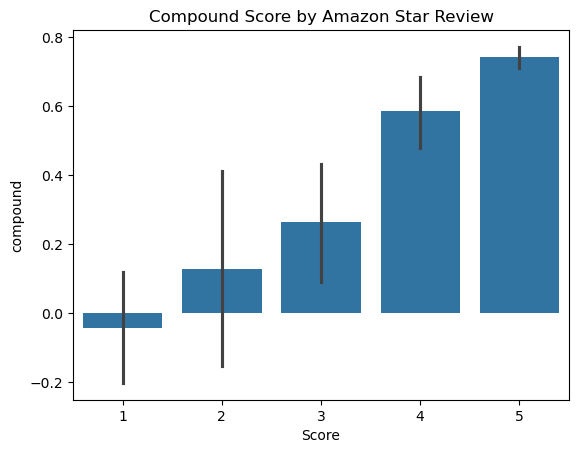

In [169]:
ax=sns.barplot(data=vaders, x="Score", y="compound")
ax.set_title("Compound Score by Amazon Star Review")
plt.show()

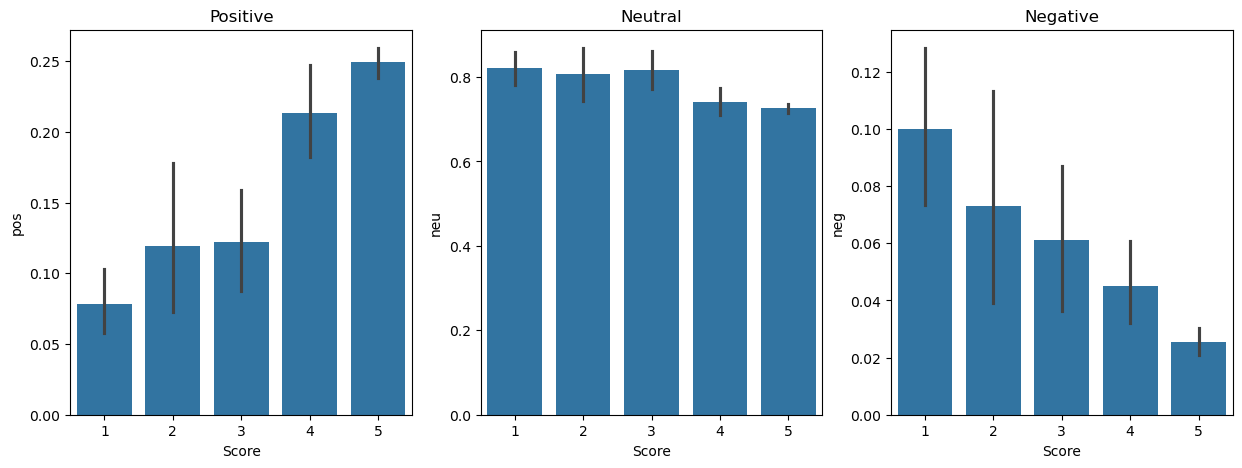

In [170]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
sns.barplot(data=vaders, x="Score", y="pos",ax=axs[0])
sns.barplot(data=vaders, x="Score", y="neu",ax=axs[1])
sns.barplot(data=vaders, x="Score", y="neg",ax=axs[2])
axs[0].set_title("Positive")
axs[1].set_title("Neutral")
axs[2].set_title("Negative")
plt.show()

# Roberta Pretrained Model

In [172]:
!pip install transformers
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [173]:
!pip install torch torchvision torchaudio


In [174]:
pip install torch torchvision torchaudio


In [175]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118
Note: you may need to restart the kernel to use updated packages.


In [176]:
pip install huggingface_hub[hf_xet]


Note: you may need to restart the kernel to use updated packages.


In [177]:
from transformers.utils import logging
logging.set_verbosity_error()


In [178]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


In [179]:
#vader result on example
print(example)
sia.polarity_scores(example)

AWESOME!!! such a yummy flavor I got it as a healthy alternative to the desserts we normally eat and I am so glad that I did there are so many things you can do with Jello desserts and still have them taste good and be good for you. I will definitentally be purchasing this product again the flavor was so wonderful.


{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'compound': 0.9803}

In [180]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import torch


# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

# Encode text (fix: return_tensors, not return_tensor)
encoded_text = tokenizer(example, return_tensors="pt")

# Get model output
output = model(**encoded_text)

# Convert to numpy
scores = output.logits[0].detach().numpy()
scores = softmax(scores)

# Map scores to labels
scores_dict = {
    "roberta_neg": scores[0],
    "roberta_neu": scores[1],
    "roberta_pos": scores[2]
}

print(scores_dict)


{'roberta_neg': 0.0016300853, 'roberta_neu': 0.0053900527, 'roberta_pos': 0.9929798}


In [181]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors="pt")

    output = model(**encoded_text)

    scores = output.logits[0].detach().numpy()
    scores = softmax(scores)

    scores_dict = {
    "roberta_neg": scores[0],
    "roberta_neu": scores[1],
    "roberta_pos": scores[2]
    }
    return scores_dict

In [182]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row["Text"]
    myid = row["Id"]

    # Vader sentiment
    vader_result = sia.polarity_scores(text)

    # Fix: remove extra indentation
    vader_result_rename = {}
    for key, value in vader_result.items():
        vader_result_rename[f"vader_{key}"] = value

    # Roberta sentiment
    roberta_result = polarity_scores_roberta(text)

    # Merge results
    both = {**vader_result_rename, **roberta_result}

    res[myid]=both


100%|██████████| 500/500 [01:13<00:00,  6.82it/s]


In [183]:
results_df=pd.DataFrame(res).T
results_df=results_df.reset_index().rename(columns={"index":"Id"})
results_df=results_df.merge(df,how="left")

# compare scores between models

In [185]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

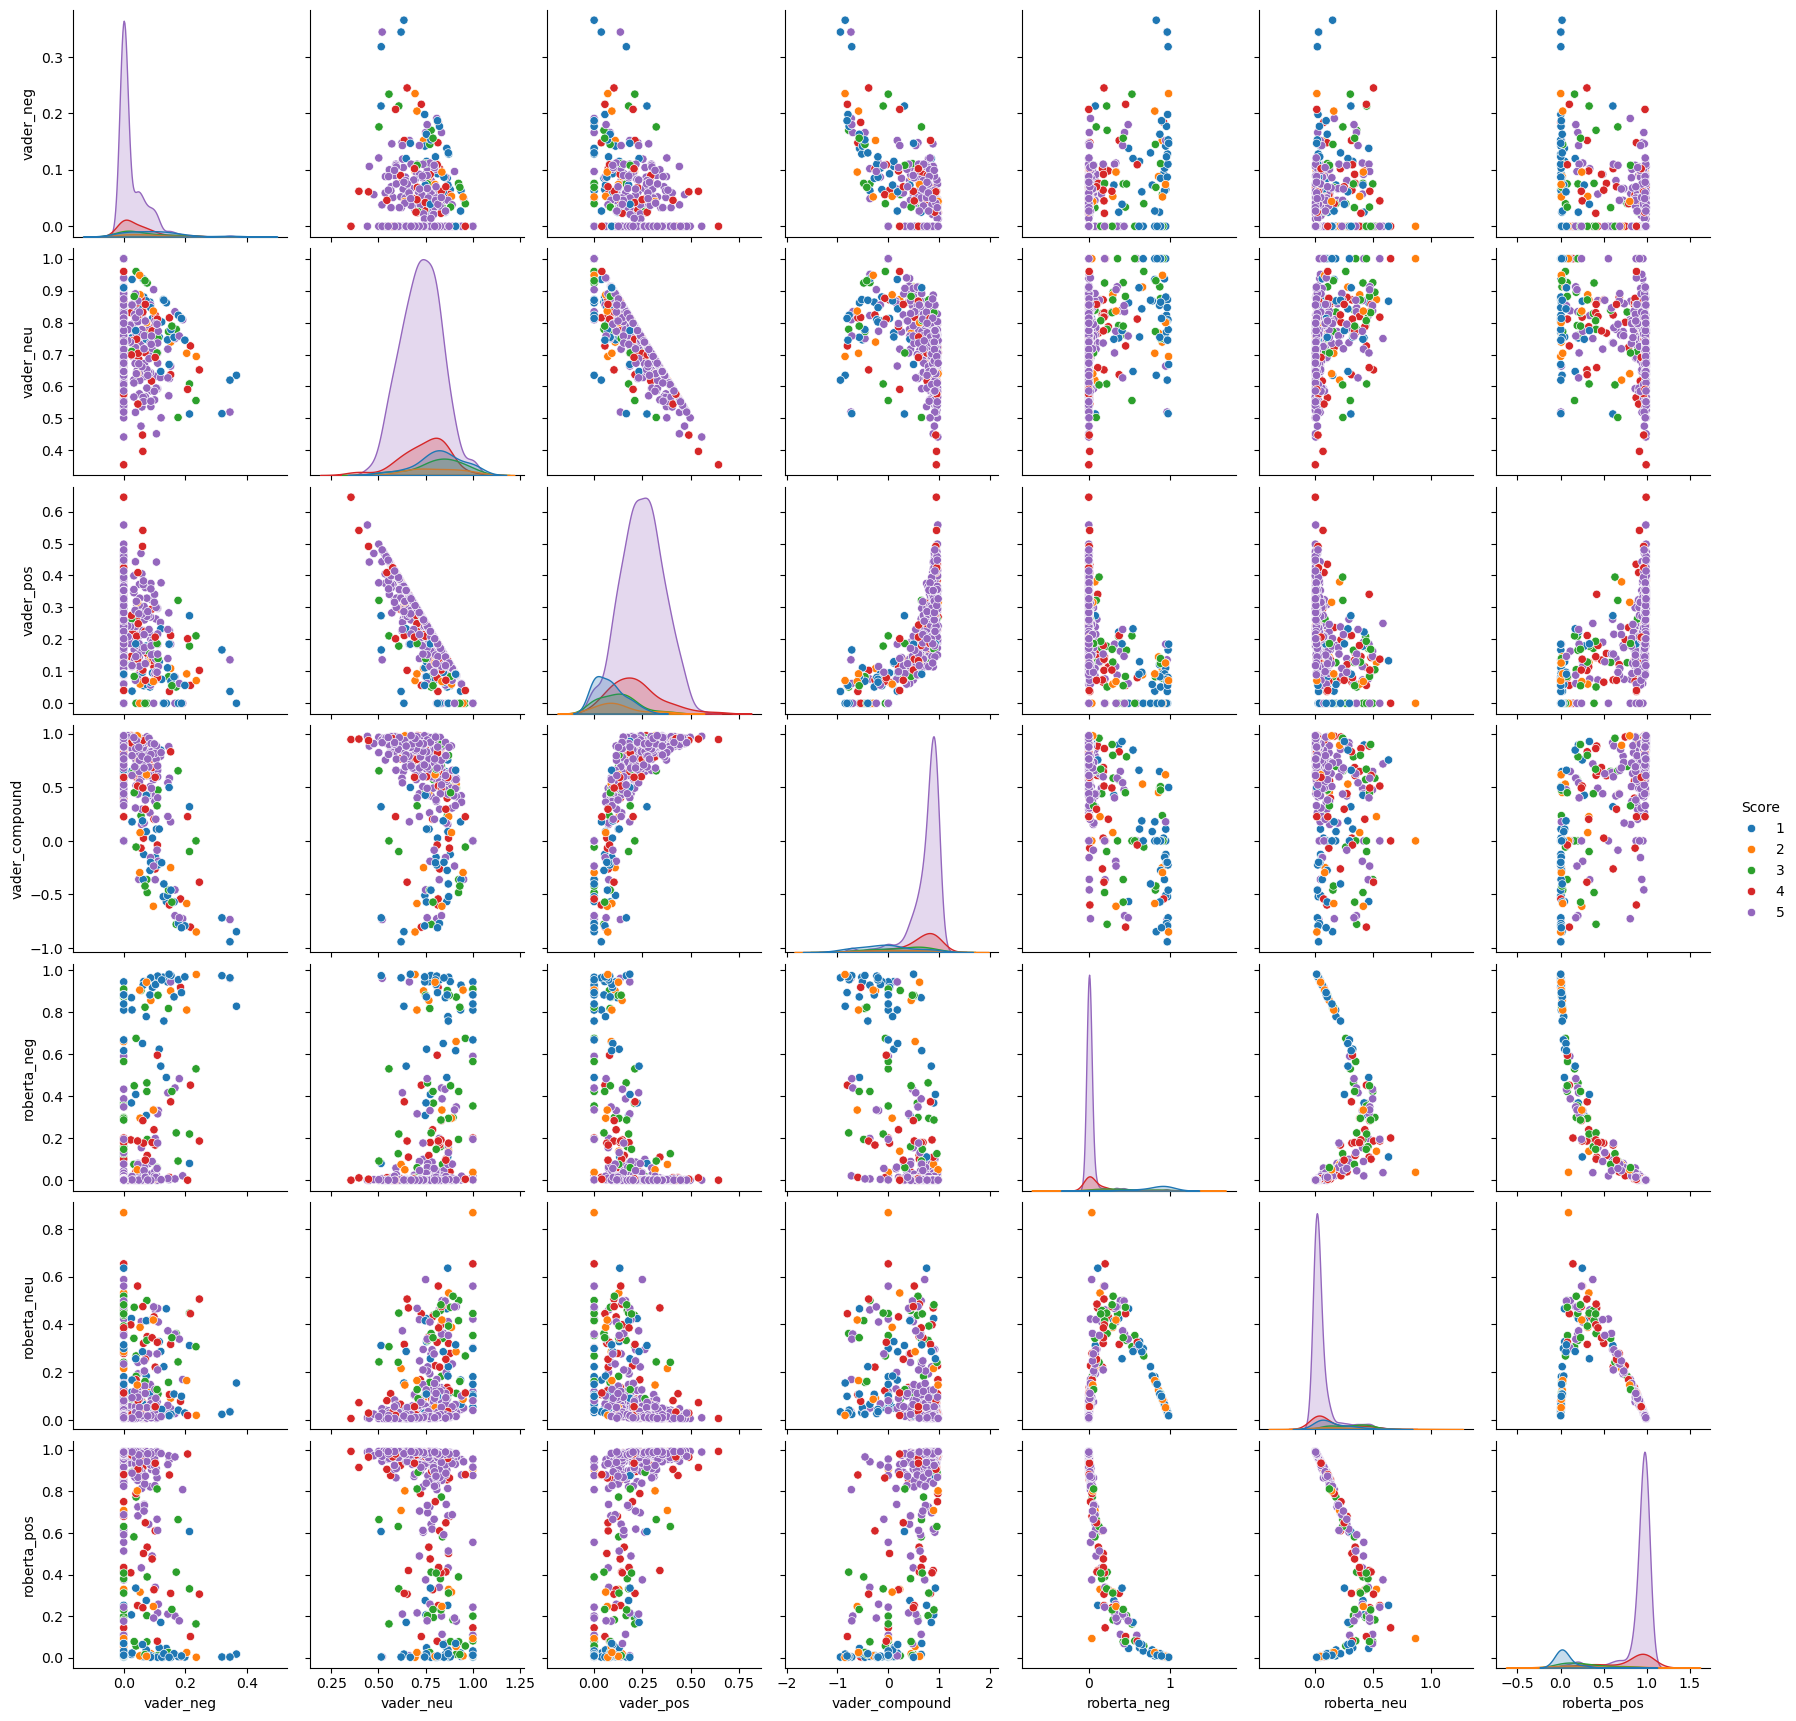

In [186]:
sns.pairplot(data=results_df,vars=['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos'],hue="Score",palette="tab10")
plt.show()

# review examples

In [188]:
results_df.query("Score == 1").sort_values("roberta_pos", ascending=False)["Text"].values[0]

"I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months."

In [237]:
#up as a neg sentence but due to words of affirmation used it is taken as positive review

In [239]:
results_df.query("Score == 1").sort_values("vader_pos", ascending=False)["Text"].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [241]:
#negative sentiment 5 start review

In [243]:
results_df.query("Score == 5").sort_values("roberta_neg", ascending=False)["Text"].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [245]:
results_df.query("Score == 5").sort_values("vader_neg", ascending=False)["Text"].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

# transformers pipeline

In [248]:
from transformers import pipeline

In [252]:
import os
os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"


In [256]:
pip install huggingface_hub[hf_xet]


In [258]:
pip install ipywidgets


Note: you may need to restart the kernel to use updated packages.


In [260]:
import ipywidgets as widgets


In [262]:
from transformers import pipeline

sent_pipeline=pipeline("sentiment-analysis")